# Partie 1 - Base de données, Analyse, Prétraitement et Préparation

Appliquez les traitements nécessaires pour préparer la DataSet en utilisant Numpy et Pandas, (vous pouvez trouver un référentiel sur ressource) (présenter votre pipeline dans le compte rendu). NB. Le résultat de classification dépond essentiellement de la qualité du prétraitement.

## 1) Importation des bibliothèques

In [1]:
import pandas as pd
import numpy as np

## 2) Visualisation des données 

In [2]:
dataset = pd.read_csv("DataSet/combined_csv.csv")
dataset

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Score,Interpretation
0,a,a,a,a,a,1,1,1,1,1,10,B
1,b,b,b,b,b,2,2,2,2,2,0,C
2,c,c,c,c,c,3,3,3,3,3,20,A
3,a,b,c,a,b,1,2,3,1,2,8,C
4,b,c,a,c,a,3,2,3,1,2,11,B
...,...,...,...,...,...,...,...,...,...,...,...,...
210,c,c,NaN,c,c,NaN,NaN,3.0,3,3,14,B
211,b,a,c,NaN,b,NaN,2.0,NaN,3,2,5,C
212,a,c,b,NaN,NaN,1.0,NaN,3.0,2,3,8,C
213,a,n,e,a,b,v,t,Y,',1,3,C


## 3) Pré-traitement des données

Notre jeu de données comporte plusieurs erreurs. Premièrement, il comporte des NaN, c'est-à-dire des valeurs manquantes. Deuxièmement, il comporte des valeurs erronées, qui ne correspondent pas aux valeurs acceptées en entrée par le questionnaire. Il faut donc les remplacer. 

### 3.1) Traitement des valeurs manquantes NaN

In [3]:
dataset.isnull().sum()

Q1                 8
Q2                12
Q3                13
Q4                 9
Q5                14
Q6                12
Q7                10
Q8                12
Q9                10
Q10                8
Score              0
Interpretation     0
dtype: int64

On observe plusieurs valeurs manquantes. On peut soit les remplacer par des valeurs nulles (b où 2), où utiliser la fonction "mode" de pandas. Celle-ci va rendre compte des valeurs les plus rendondantes dans chaque colonne du dataset.

In [4]:
dataset.mode().iloc[0]

Q1                  a
Q2                  b
Q3                  c
Q4                  a
Q5                  a
Q6                  2
Q7                  3
Q8                  2
Q9                  1
Q10                 2
Score             8.0
Interpretation      C
Name: 0, dtype: object

On remplace les NaN par les données explicitées ci-dessus.

In [5]:
dataset.fillna(dataset.mode().iloc[0], inplace=True)
dataset

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Score,Interpretation
0,a,a,a,a,a,1,1,1,1,1,10,B
1,b,b,b,b,b,2,2,2,2,2,0,C
2,c,c,c,c,c,3,3,3,3,3,20,A
3,a,b,c,a,b,1,2,3,1,2,8,C
4,b,c,a,c,a,3,2,3,1,2,11,B
...,...,...,...,...,...,...,...,...,...,...,...,...
210,c,c,c,c,c,2,3,3.0,3,3,14,B
211,b,a,c,a,b,2,2.0,2,3,2,5,C
212,a,c,b,a,a,1.0,3,3.0,2,3,8,C
213,a,n,e,a,b,v,t,Y,',1,3,C


On vérifie qu'il ne nous reste plus de valeurs manquantes NaN.

In [6]:
dataset.isnull().sum()

Q1                0
Q2                0
Q3                0
Q4                0
Q5                0
Q6                0
Q7                0
Q8                0
Q9                0
Q10               0
Score             0
Interpretation    0
dtype: int64

### 3.2) Traitement des valeurs erronées

Notre hypothèse de travail sera la suivante: <br/>
1) On va devoir séparer les valeurs de notre jeu de données en deux: True et False. <br/>
2) Ensuite, on remplace l'une des deux valeurs (qui représente les valeurs erronnées) par un NaN. <br/>
3) Enfin, on applique la solution effectuée à la question précédente, pour remplacer les NaN par les valeurs de la fonction .mode() <br/>

#### 3.2.1) Remplacement des valeurs par True et False

On va devoir remplacer toutes les valeurs qui ne correspondent pas à a, b, c ou 1,2 et 3.

In [7]:
dataset.iloc[:, 0:10].isin(["a", "b", "c", "1", "2", "3"])

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
0,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...
210,True,True,True,True,True,True,True,False,True,True
211,True,True,True,True,True,True,False,True,True,True
212,True,True,True,True,True,False,True,False,True,True
213,True,False,False,True,True,False,False,False,False,True


#### 3.2.2) Remplacement des valeurs erronnées par des NaN

On écrase notre dataset originel par le nouveau dataset dans lequel les valeurs erronées sont remplacées par des NaN. 

In [8]:
dataset.iloc[:, 0:10] = dataset.iloc[:, 0:10].where(dataset.iloc[:, 0:10].isin(["a", "b", "c", "1", "2", "3"]))
dataset

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Score,Interpretation
0,a,a,a,a,a,1,1,1,1,1,10,B
1,b,b,b,b,b,2,2,2,2,2,0,C
2,c,c,c,c,c,3,3,3,3,3,20,A
3,a,b,c,a,b,1,2,3,1,2,8,C
4,b,c,a,c,a,3,2,3,1,2,11,B
...,...,...,...,...,...,...,...,...,...,...,...,...
210,c,c,c,c,c,2,3,NaN,3,3,14,B
211,b,a,c,a,b,2,NaN,2,3,2,5,C
212,a,c,b,a,a,NaN,3,NaN,2,3,8,C
213,a,NaN,NaN,a,b,NaN,NaN,NaN,NaN,1,3,C


#### 3.2.3) Remplacement des NaN par la fonction .mode()

In [9]:
dataset.fillna(dataset.mode().iloc[0], inplace=True)
dataset

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Score,Interpretation
0,a,a,a,a,a,1,1,1,1,1,10,B
1,b,b,b,b,b,2,2,2,2,2,0,C
2,c,c,c,c,c,3,3,3,3,3,20,A
3,a,b,c,a,b,1,2,3,1,2,8,C
4,b,c,a,c,a,3,2,3,1,2,11,B
...,...,...,...,...,...,...,...,...,...,...,...,...
210,c,c,c,c,c,2,3,2,3,3,14,B
211,b,a,c,a,b,2,3,2,3,2,5,C
212,a,c,b,a,a,2,3,2,2,3,8,C
213,a,b,c,a,b,2,3,2,1,1,3,C


#### 3.2.4) Remplacement des valeurs et conversion du dtype

Une fois que les NaN et les valeurs erronées ont été nettoyées de la base de donnée, il va falloir changer les lettres (A,B,C) par des chiffres (1,2,3), puis convertir les dtypes "object" en "int32".

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Q1              215 non-null    object
 1   Q2              215 non-null    object
 2   Q3              215 non-null    object
 3   Q4              215 non-null    object
 4   Q5              215 non-null    object
 5   Q6              215 non-null    object
 6   Q7              215 non-null    object
 7   Q8              215 non-null    object
 8   Q9              215 non-null    object
 9   Q10             215 non-null    object
 10  Score           215 non-null    int64 
 11  Interpretation  215 non-null    object
dtypes: int64(1), object(11)
memory usage: 20.3+ KB


On remplace les lettres par des chiffres.

In [11]:
dataset= dataset.replace(['a', 'b', 'c'], [1, 2, 3])
dataset= dataset.replace(['A', 'B', 'C'], [1, 2, 3])
dataset


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Score,Interpretation
0,1,1,1,1,1,1,1,1,1,1,10,2
1,2,2,2,2,2,2,2,2,2,2,0,3
2,3,3,3,3,3,3,3,3,3,3,20,1
3,1,2,3,1,2,1,2,3,1,2,8,3
4,2,3,1,3,1,3,2,3,1,2,11,2
...,...,...,...,...,...,...,...,...,...,...,...,...
210,3,3,3,3,3,2,3,2,3,3,14,2
211,2,1,3,1,2,2,3,2,3,2,5,3
212,1,3,2,1,1,2,3,2,2,3,8,3
213,1,2,3,1,2,2,3,2,1,1,3,3


Puis on convertit les "dtypes"

In [12]:
dataset.astype("int")

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Score,Interpretation
0,1,1,1,1,1,1,1,1,1,1,10,2
1,2,2,2,2,2,2,2,2,2,2,0,3
2,3,3,3,3,3,3,3,3,3,3,20,1
3,1,2,3,1,2,1,2,3,1,2,8,3
4,2,3,1,3,1,3,2,3,1,2,11,2
...,...,...,...,...,...,...,...,...,...,...,...,...
210,3,3,3,3,3,2,3,2,3,3,14,2
211,2,1,3,1,2,2,3,2,3,2,5,3
212,1,3,2,1,1,2,3,2,2,3,8,3
213,1,2,3,1,2,2,3,2,1,1,3,3


## 4) Modèle KNN avec Sklearn

Une fois que le jeu de données est nettoyé, on va pouvoir créer notre modèle KNN. 

### 4.1) Séparation du jeu de données

In [19]:
X = dataset.drop(['Interpretation'], axis=1)

y = dataset['Interpretation']

In [20]:
, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)from sklearn.model_selection import train_test_split

X_train, X_test, y_train

In [21]:
X_train.shape, X_test.shape

((172, 11), (43, 11))

### 4.2) GridSearch

In [45]:
from sklearn.model_selection import GridSearchCV

#### 4.2.1) Réglage des hyperparamètres

A partir d'ici, nous allos régler les paramètres pour l'application du GridSearch. Il va donc falloir régler les hyperparamètres que nous voulons, c'est-à-dire le nombre de "K" ainsi que la distance. On va avoir en sortie les meilleurs paramtètres.

In [60]:
grid_params = { 'n_neighbors' : np.arange(1,30),
               'metric' : ['minkowski','euclidean','manhattan']}

In [93]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose=1, cv=5)

On applique les paramètres aux données d'entraînement. 

In [87]:
g_res = gs.fit(X_train, y_train)

Fitting 5 folds for each of 87 candidates, totalling 435 fits


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 435 out of 435 | elapsed:    7.1s finished


On affiche les meilleurs paramètres retenus:

In [89]:
g_res.best_params_

{'metric': 'minkowski', 'n_neighbors': 18}

On retient donc qu'il faut utiliser la distance Minkowski ainsi qu'un nombre de K égal à 18.

#### 4.2.2) Phase de calcul

In [78]:
knn = KNeighborsClassifier(n_neighbors = 18,metric = 'minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=18)

In [92]:
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)

On affiche la précision obtenue

In [80]:
from sklearn import metrics
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn))

Training set accuracy:  0.9418604651162791
Test set accuracy:  0.9069767441860465


#### 4.2.3) Matrice de confusion

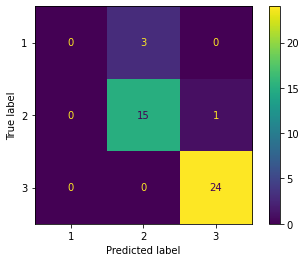

In [95]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test)

Le modèle ne s'est pas beaucoup trompé, ce qui est normal, sa précision étant très haute.